# Optimizing Sink Position in a Wireless Sensor Network

<Axes: xlabel='x', ylabel='y'>

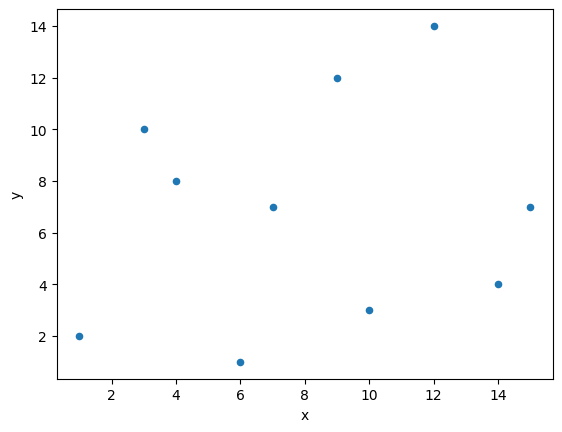

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

sensors = pd.DataFrame([(1, 2), (10, 3), (4, 8), (15, 7), (6, 1), (9, 12), (14, 4), (3, 10), (7, 7), (12, 14)], columns=['x', 'y'])

cycle_time = 10 # minutes
b = 2000 # bit
Eb = 5 # mJ
Ec = 50 # nJ/bit
k = 1 # nJ/bit/m^2
Etx = lambda d: k * d**2 # nJ/bit

sensors.plot(kind='scatter', x='x', y='y')


## A. Find the lifetime of the system
when the sink is placed at the fixed position (xs,ys)=(20,20). The lifetime is defined as the time until the first sensor's battery dies, based on the energy consumption of the sensors.

Answer: Since energy consumption is based on distance the most distant node will be the first to die, let's do the math.

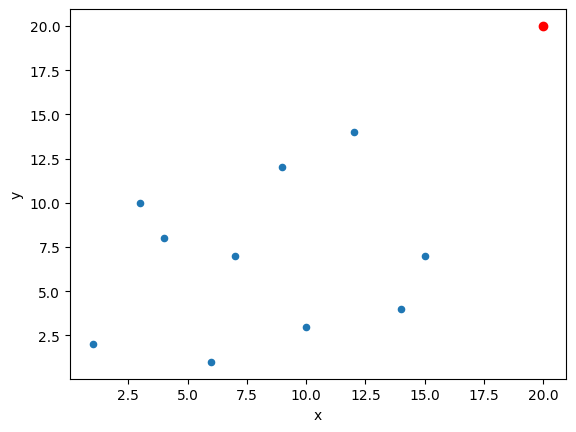

The most distant node will be able to do 3 full cycles, so 30 minutes


In [3]:
sink_node = np.array([20, 20])

sensors.plot(kind='scatter', x='x', y='y')
plt.scatter(sink_node[0], sink_node[1], color='red')
plt.show()

max_distance = np.linalg.norm(sensors[['x', 'y']].values - sink_node, axis=1).max()

energy_most_distant = (Ec + Etx(max_distance)) * b

duration_most_distant = int(Eb * 1e6 // energy_most_distant)

print(f"The most distant node will be able to do {duration_most_distant} full cycles, so {duration_most_distant*cycle_time} minutes")

## B. Find the optimal position of the sink
that maximizes the system lifetime. Provide the coordinates (xs,ys) of the sink that minimizes the energy consumption of the worst-case sensor (the sensor that consumes the most energy).

Answer: Since energy consumption is based on distance minimizing the distance between every node and the sink will do it.

The optimal position of the sink is x:6.87, y:7.66


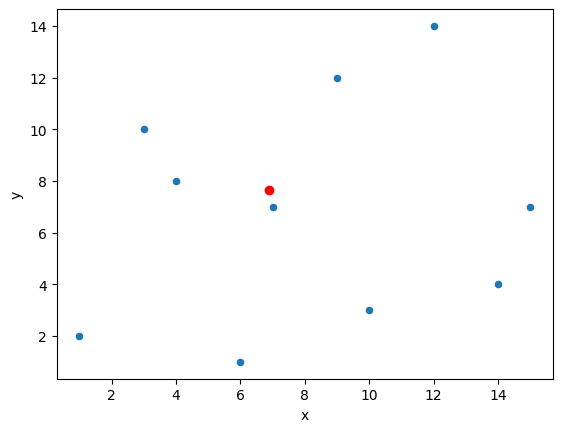

The most distant node will be able to do 21 full cycles, so 210 minutes


In [ ]:
sink_node = minimize(
    lambda sink: np.max(np.sum((sensors - sink) ** 2, axis=1)),
    np.mean(sensors, axis=0),
    method='Nelder-Mead').x

print(f"The optimal position of the sink is x:{sink_node[0]:.2f}, y:{sink_node[1]:.2f}")

sensors.plot(kind='scatter', x='x', y='y')
plt.scatter(sink_node[0], sink_node[1], color='red')
plt.show()

max_distance = np.linalg.norm(sensors[['x', 'y']].values - sink_node, axis=1).max()

energy_most_distant = (Ec + Etx(max_distance)) * b

duration_most_distant = int(Eb * 1e6 // energy_most_distant)

print(f"The most distant node will be able to do {duration_most_distant} full cycles, so {duration_most_distant*cycle_time} minutes")

# C. Discuss the trade-offs
involved in choosing a fixed sink position versus dynamically moving the sink. Consider the impact on system lifetime and energy consumption of each sensor.

Answer: 